1. Task Description:
    - This task is part of the "Semantic Web Challenge on Tabular Data to Knowledge Graph Matching" in ISWC 2023.
    - It is based on the WDC-SOTAB benchmark.
    - The goal is to annotate the semantic types of table columns using pre-defined terms from DBpedia.
    - It is a multi-class classification problem where each column can be annotated with only one type.
    - The set of pre-defined DBpedia terms consists of **46** terms listed in the "cta_labels_round2_dbpedia.txt" file.
2. Annotation Instructions:
    - Annotate the semantic types of table columns using terms from the "cta_labels_round2_dbpedia.txt" file.
    - Prepare a CSV file for submission, where each line represents a column prediction.
    - The columns in the CSV should be named as follows: "table_name", "column_index", "label".
    - The "table_name" column should include the full name of the table, including the extension (e.g., Product_corememoriesco.com_September2020_CTA.json.gz).
    - The "column_index" refers to the position of the column in the table, starting from 0.
    - The "label" refers to the predicted semantic type, and each column should have only one predicted label.
3. Dataset and Files:
    - The necessary datasets and files can be found in the provided links.
    - The training set is available in the "sotab_cta_train_round2_dbpedia.csv" file, which provides the table names, column indices, and ground truth labels for each column.
    - The validation set is in the "sotab_cta_validation_round2_dbpedia.csv" file, having the same structure as the training set.
    - To evaluate predictions on the validation set, you can use the "SOTAB_Evaluator.py" script with the command: **`python SOTAB_Evaluator.py /path/to/submission/file /path/to/ground/truth/file`**.
    - The test targets are provided in the "sotab_cta_test_targets_round2_dbpedia.csv" file, which includes the table name and the target column index.
    - All tables are stored in JSON files, where each line represents a row in the table. Use the code snippet **`table_df = pd.read_json(path, compression='gzip', lines=True)`** to open a table.
    - The label set for prediction is stored in the "cta_labels_round2_dbpedia.txt" file.

In [7]:
import pandas as pd
import gzip
import json
import matplotlib.pyplot as plt
import os

In [8]:
# Read all 80 terms provided in cta_labels_round2.txt
file_path_terms = 'dataset\Round2-SOTAB-CTA-DBP-Datasets\cta_labels_round2_dbpedia.txt'

with open(file_path_terms, 'r') as file:
    lines = file.readlines()

print(lines)

print(f'\n Totle number of terms in cpa_labels_round2.txt are : {len(lines)}')

['https://dbpedia.org/ontology/WrittenWork\n', 'https://dbpedia.org/ontology/Person\n', 'https://dbpedia.org/ontology/Language\n', 'https://dbpedia.org/ontology/Organisation\n', 'https://dbpedia.org/ontology/dateTime\n', 'https://dbpedia.org/ontology/boolean\n', 'https://dbpedia.org/ontology/date\n', 'https://dbpedia.org/ontology/time\n', 'https://dbpedia.org/ontology/Hotel\n', 'https://dbpedia.org/ontology/Place\n', 'https://dbpedia.org/ontology/Country\n', 'https://dbpedia.org/ontology/Locality\n', 'https://dbpedia.org/ontology/Street\n', 'https://dbpedia.org/ontology/Image\n', 'https://dbpedia.org/ontology/PostalCode\n', 'https://dbpedia.org/ontology/review\n', 'https://dbpedia.org/ontology/Identifier\n', 'https://dbpedia.org/ontology/Currency\n', 'https://dbpedia.org/ontology/Museum\n', 'https://dbpedia.org/ontology/Region\n', 'https://dbpedia.org/ontology/Song\n', 'https://dbpedia.org/ontology/Album\n', 'https://dbpedia.org/ontology/MusicalArtist\n', 'https://dbpedia.org/ontology/

In [9]:
# Read a sample file and sources residing in it : File name and data residing in it. 
file_path_gz = 'dataset/Round2-SOTAB-CTA-Tables/Book_11x17.pt_September2020_CTA.json.gz'  # Replace with the actual file path of your JSON file
df = pd.read_json(file_path_gz, lines=True, compression='gzip')

In [10]:
df.head()

,0,1,2,3
0,9789722539739,A Cidade Perdida,728,2020-07-10
1,9789722531924,A Cúpula - livro 1,704,2016-04-08
2,9789722527118,Misery,480,2013-09-13
3,9789722532457,A Cúpula - Livro 2,656,2016-08-05
4,9789722537636,O Olho de Deus,528,2019-05-10


In [11]:
# Reading the provided training, validation, and testing dataset
file_path_train = 'dataset\Round2-SOTAB-CTA-DBP-Datasets\sotab_cta_train_round2_dbpedia.csv'
file_path_validate = 'dataset\Round2-SOTAB-CTA-DBP-Datasets\sotab_cta_validation_round2_dbpedia.csv' 
file_path_test = 'dataset\Round2-SOTAB-CTA-DBP-Datasets\sotab_cta_test_targets_round2_dbpedia.csv'

df_train = pd.read_csv(file_path_train)
df_validate = pd.read_csv(file_path_validate)
df_test = pd.read_csv(file_path_test)

print(f'\n Dimension of the train dataframe are {df_train.shape}')
print(f'\n Dimension of the validaiton dataframe are {df_validate.shape}')
print(f'\n Dimension of the test dataframe are {df_test.shape}')


 Dimension of the train dataframe are (85561, 3)

 Dimension of the validaiton dataframe are (731, 3)

 Dimension of the test dataframe are (681, 2)


In [12]:
print('Training dataset')
df_train.head()

Training dataset


,table_name,column_index,label
0,Book_11x17.pt_September2020_CTA.json.gz,3,https://dbpedia.org/ontology/date
1,Book_12min.com_September2020_CTA.json.gz,0,https://dbpedia.org/ontology/Book
2,Book_12min.com_September2020_CTA.json.gz,2,https://dbpedia.org/ontology/Language
3,Book_1carpetcleaning.co.uk_September2020_CTA.j...,0,https://dbpedia.org/ontology/Organisation
4,Book_1carpetcleaning.co.uk_September2020_CTA.j...,7,https://dbpedia.org/ontology/Person


In [13]:
print('Validaiton dataset')
df_validate.head()

Validaiton dataset


,table_name,column_index,label
0,CreativeWork_1stpreschurchionia.com_September2...,0,https://dbpedia.org/ontology/WrittenWork
1,CreativeWork_1stpreschurchionia.com_September2...,2,https://dbpedia.org/ontology/Person
2,CreativeWork_221plus.ie_September2020_CTA.json.gz,2,https://dbpedia.org/ontology/dateTime
3,CreativeWork_221plus.ie_September2020_CTA.json.gz,3,https://dbpedia.org/ontology/dateTime
4,CreativeWork_222home.com_September2020_CTA.jso...,2,https://dbpedia.org/ontology/Organisation


In [14]:
print('Test dataset')
df_test.head()

Test dataset


,table_name,column_index
0,CreativeWork_2agenten.com_September2020_CTA.js...,1
1,CreativeWork_biliranisland.com_September2020_C...,3
2,CreativeWork_biliranisland.com_September2020_C...,4
3,CreativeWork_biodiversitylibrary.org_September...,2
4,CreativeWork_cityofmulberryfl.org_September202...,0


### Functional Data Analysis (FDA) on Train dataset

In [15]:
# Look at the head of the train dataset
df_train.head()

,table_name,column_index,label
0,Book_11x17.pt_September2020_CTA.json.gz,3,https://dbpedia.org/ontology/date
1,Book_12min.com_September2020_CTA.json.gz,0,https://dbpedia.org/ontology/Book
2,Book_12min.com_September2020_CTA.json.gz,2,https://dbpedia.org/ontology/Language
3,Book_1carpetcleaning.co.uk_September2020_CTA.j...,0,https://dbpedia.org/ontology/Organisation
4,Book_1carpetcleaning.co.uk_September2020_CTA.j...,7,https://dbpedia.org/ontology/Person


In [16]:
# Create a sample with labels which occures atleast 2 or 3 times

# Make a groupby with the specific column --> here it is label
grouped = df_train.groupby('label')
grouped

In [17]:
# Capturing specific raws which can be processed on the machine

# df_train_5 = df_train[:1000]
df_train_5 = grouped.apply(lambda x: x.sample(n=15))
df_train_5 = df_train_5.reset_index(drop=True)

In [18]:
print(f"Total number of samples in dataset are: {df_train.size}")
print(f"Total number of unique tables present in training dataset: {df_train['table_name'].nunique()}")
print(f"Total number of unique labels present in training dataset: {df_train['label'].nunique()}")

# print(f'Highest number of column idex is: {df_train["column_index"].max}')

Total number of samples in dataset are: 256683
Total number of unique tables present in training dataset: 37631
Total number of unique labels present in training dataset: 46


In [19]:
df_train['column_index'].max()

29

In [20]:
# Maximum number of column_index a table can have
maximum_no_of_column_by_table = df_train.groupby('table_name')['column_index'].max() + 1

In [21]:
maximum_no_of_column_by_table_to_df = maximum_no_of_column_by_table.reset_index()

In [22]:
maximum_no_of_column_by_table_to_df.head()

,table_name,column_index
0,Book_11x17.pt_September2020_CTA.json.gz,4
1,Book_12min.com_September2020_CTA.json.gz,3
2,Book_1carpetcleaning.co.uk_September2020_CTA.j...,8
3,Book_247creative.de_September2020_CTA.json.gz,7
4,Book_24symbols.com_September2020_CTA.json.gz,5


In [23]:
value_counts = maximum_no_of_column_by_table_to_df['column_index'].value_counts().sort_index()

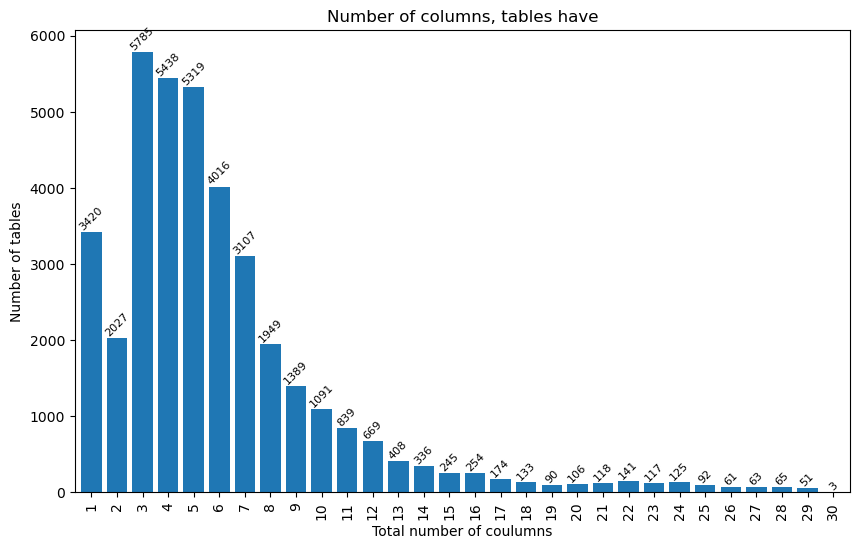

In [24]:
# setting a figure size
plt.figure(figsize=(10, 6))

# plotting the bar chart
ax = value_counts.plot(kind='bar', width=0.8)

# settting the labels and title
plt.xlabel('Total number of coulumns')
plt.ylabel('Number of tables')
plt.title('Number of columns, tables have')

# Add count values on top of each bar
for i, v in enumerate(value_counts):
    ax.text(i, v, str(v), ha='center', va='bottom', rotation=45, fontsize=8)

# displaying the chart
plt.show()

# # Print the value counts
# print("Value Counts:")
# print(value_counts)

#### Prepapring the input file dataset 

In [25]:
# Path to the folder where the tables are stored
folder_path = 'dataset/Round2-SOTAB-CTA-Tables/'

# A column 'data_value' will work as a input dataset to our model
df_train_5['data_value'] = None

# Iterate over each row in the dataframe
for index, row in df_train_5.iterrows():
    table_name = row['table_name']
    column_name = row['column_index']
    
    # Check if the table file exists in the folder
    table_file_path = os.path.join(folder_path, table_name)  # Assuming the tables are stored as CSV files
    
    if os.path.isfile(table_file_path):
        # Load the table file into a dataframe
        table_df = pd.read_json(table_file_path, lines=True, compression='gzip')
        
        # Check if the column exists in the table dataframe
        if column_name in table_df.columns:
            # Fetch the column data
            column_data = table_df[column_name]
            
            # Assign the column data to the 'data_value' column in the original dataframe
            df_train_5.at[index, 'data_value'] = column_data.tolist()
            
            # Do something with the column data
            # For example, print the first 5 values
#             print(f"Table: {table_name}, Column: {column_name}")
#             print(column_data.head())
#             print()
        else:
            print(f"Column '{column_name}' does not exist in table '{table_name}'.")
    else:
        print(f"Table '{table_name}' does not exist in the folder.")



In [26]:
df_train_5

,table_name,column_index,label,data_value
0,MusicRecording_watchfuleye.com_September2020_C...,3,https://dbpedia.org/ontology/Album,"[Tangent, Early Work, Tangent, Early Work, Tan..."
1,MusicRecording_theanxietyeffect.net_September2...,3,https://dbpedia.org/ontology/Album,"[The Anxiety Effect E.P., Neon Raid, Neon Raid..."
2,MusicAlbum_hotlbr.com_September2020_CTA.json.gz,0,https://dbpedia.org/ontology/Album,"[P Flow Ft HudzPro – Sexy Lady, ELLE P DA FIYA..."
3,MusicRecording_lntmusic.com_September2020_CTA....,3,https://dbpedia.org/ontology/Album,"[Worth It., Moonlit Memories EP, Moonlit Memor..."
4,MusicRecording_davestanleyband.com_September20...,2,https://dbpedia.org/ontology/Album,"[Dave Stanley Band, None, None, Dave Stanley B..."
...,...,...,...,...
685,Product_thepashm.com_September2020_CTA.json.gz,4,https://dbpedia.org/ontology/weight,"[None, None, 6.3oz, 10.0oz, 10.0oz, 8.0oz, 10...."
686,Product_lojamises.com.br_September2020_CTA.jso...,2,https://dbpedia.org/ontology/weight,"[185 g, 159 g, 185 g, 120 g, 159 g, 329 g, 195..."
687,Product_vesuviustreamline.com_September2020_CT...,2,https://dbpedia.org/ontology/weight,"[1.000 Kgs, 4.000 Kgs, 0.300 Kgs, 0.200 Kgs, 0..."
688,Product_bachelorettepartyfun.com_September2020...,7,https://dbpedia.org/ontology/weight,"[1.55 lbs, 1.25 lbs, 0.15 lbs, 0.20 lbs, 0.32 ..."


In [27]:
df_train_5_ml = df_train_5[['label','data_value']]
df_train_5_ml

,label,data_value
0,https://dbpedia.org/ontology/Album,"[Tangent, Early Work, Tangent, Early Work, Tan..."
1,https://dbpedia.org/ontology/Album,"[The Anxiety Effect E.P., Neon Raid, Neon Raid..."
2,https://dbpedia.org/ontology/Album,"[P Flow Ft HudzPro – Sexy Lady, ELLE P DA FIYA..."
3,https://dbpedia.org/ontology/Album,"[Worth It., Moonlit Memories EP, Moonlit Memor..."
4,https://dbpedia.org/ontology/Album,"[Dave Stanley Band, None, None, Dave Stanley B..."
...,...,...
685,https://dbpedia.org/ontology/weight,"[None, None, 6.3oz, 10.0oz, 10.0oz, 8.0oz, 10...."
686,https://dbpedia.org/ontology/weight,"[185 g, 159 g, 185 g, 120 g, 159 g, 329 g, 195..."
687,https://dbpedia.org/ontology/weight,"[1.000 Kgs, 4.000 Kgs, 0.300 Kgs, 0.200 Kgs, 0..."
688,https://dbpedia.org/ontology/weight,"[1.55 lbs, 1.25 lbs, 0.15 lbs, 0.20 lbs, 0.32 ..."


## Do some ML 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [30]:
new_df = df_train_5_ml.explode('data_value', ignore_index=True).apply(pd.Series.explode)

In [31]:
new_df['label'].nunique()

46

In [32]:
unique_labels = new_df['label'].unique()
print(unique_labels)

['https://dbpedia.org/ontology/Album' 'https://dbpedia.org/ontology/Book'
 'https://dbpedia.org/ontology/Category'
 'https://dbpedia.org/ontology/Company'
 'https://dbpedia.org/ontology/Country'
 'https://dbpedia.org/ontology/Currency'
 'https://dbpedia.org/ontology/Event' 'https://dbpedia.org/ontology/Film'
 'https://dbpedia.org/ontology/Hotel'
 'https://dbpedia.org/ontology/Identifier'
 'https://dbpedia.org/ontology/Image'
 'https://dbpedia.org/ontology/Language'
 'https://dbpedia.org/ontology/List'
 'https://dbpedia.org/ontology/Locality'
 'https://dbpedia.org/ontology/Museum'
 'https://dbpedia.org/ontology/MusicalArtist'
 'https://dbpedia.org/ontology/Organisation'
 'https://dbpedia.org/ontology/Person'
 'https://dbpedia.org/ontology/Place'
 'https://dbpedia.org/ontology/PostalCode'
 'https://dbpedia.org/ontology/Region'
 'https://dbpedia.org/ontology/Restaurant'
 'https://dbpedia.org/ontology/Song'
 'https://dbpedia.org/ontology/SportsEvent'
 'https://dbpedia.org/ontology/SportsTe

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_df['data_value'], new_df['label'], test_size=0.2, stratify=new_df['label'], random_state=42)

In [34]:
print(y_train.shape)

(144380,)


In [35]:
# Convert X_train and X_test to lists of strings
X_train = [str(x) for x in X_train]
X_test = [str(x) for x in X_test]

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform the training and testing data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [36]:
# Create an instance of the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_vec, y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
# Evaluate the model
accuracy = model.score(X_test_vec, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7960382324421665


In [38]:
# Make predictions on the test data
y_pred = model.predict(X_test_vec)

In [42]:
# Calculate precision, recall, and F1 score
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {precision_macro}")
print(f"Recall: {recall_macro}")
print(f"F1 score: {f1_macro}")

Precision: 0.8955612770294398
Recall: 0.7087267657523736
F1 score: 0.7694985281768744


In [40]:
# new_lang = ['en-US']
# new_lang_vec = vectorizer.transform(new_dates)

# predictions = model.predict(new_lang_vec)
# print(predictions)

In [41]:
report = classification_report(y_test, y_pred)
print(report)

                                                precision    recall  f1-score   support

            https://dbpedia.org/ontology/Album       0.69      0.21      0.33       579
             https://dbpedia.org/ontology/Book       0.79      0.39      0.52       374
         https://dbpedia.org/ontology/Category       0.94      0.80      0.87       515
          https://dbpedia.org/ontology/Company       0.99      0.78      0.87       266
          https://dbpedia.org/ontology/Country       0.90      0.89      0.89       407
         https://dbpedia.org/ontology/Currency       0.99      1.00      1.00       288
            https://dbpedia.org/ontology/Event       0.99      0.65      0.78       103
             https://dbpedia.org/ontology/Film       0.71      0.64      0.67      2795
            https://dbpedia.org/ontology/Hotel       0.94      0.91      0.93      1375
       https://dbpedia.org/ontology/Identifier       0.68      0.19      0.30       238
            https://dbpedia.org

### Preparing the submission files for the competition

In [36]:
df_test_4 = df_test[:]

In [37]:
df_test_4 

,table_name,column_index
0,CreativeWork_2agenten.com_September2020_CTA.js...,1
1,CreativeWork_biliranisland.com_September2020_C...,3
2,CreativeWork_biliranisland.com_September2020_C...,4
3,CreativeWork_biodiversitylibrary.org_September...,2
4,CreativeWork_cityofmulberryfl.org_September202...,0
...,...,...
676,Product_badcattoys.com_September2020_CTA.json.gz,6
677,Product_badcattoys.com_September2020_CTA.json.gz,21
678,Product_badcattoys.com_September2020_CTA.json.gz,23
679,Product_badcattoys.com_September2020_CTA.json.gz,26


In [38]:
# Path to the folder where the tables are stored
folder_path = 'dataset/Round2-SOTAB-CTA-Tables/'
# A column 'data_value' will work as a input dataset to our model
df_test_4['data_value'] = None

# Iterate over each row in the dataframe
for index, row in df_test_4.iterrows():
    table_name = row['table_name']
    column_name = row['column_index']
    
    # Check if the table file exists in the folder
    table_file_path = os.path.join(folder_path, table_name)  # Assuming the tables are stored as CSV files
    
    if os.path.isfile(table_file_path):
        # Load the table file into a dataframe
        table_df = pd.read_json(table_file_path, lines=True, compression='gzip')
        
        # Check if the column exists in the table dataframe
        if column_name in table_df.columns:
            # Fetch the column data
            column_data = table_df[column_name]
            
            # Assign the column data to the 'data_value' column in the original dataframe
            df_test_4.at[index, 'data_value'] = column_data.tolist()
            
            # Do something with the column data
            # For example, print the first 5 values
#             print(f"Table: {table_name}, Column: {column_name}")
#             print(column_data.head())
#             print()
        else:
            print(f"Column '{column_name}' does not exist in table '{table_name}'.")
    else:
        print(f"Table '{table_name}' does not exist in the folder.")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_21720\1498760386.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_4['data_value'] = None


In [39]:
print(df_test_4.iloc[0,0])
df_test_4

CreativeWork_2agenten.com_September2020_CTA.json.gz


,table_name,column_index,data_value
0,CreativeWork_2agenten.com_September2020_CTA.js...,1,"[[JACOBIN MAGAZINE, PANDA EXPRESS RESTAURANTS,..."
1,CreativeWork_biliranisland.com_September2020_C...,3,"[None, Caibiran Jingle, 2ND MAYOR GERARD ROGER..."
2,CreativeWork_biliranisland.com_September2020_C...,4,"[None, Jalmz, Jalmz, Jalmz, None, Jalmz, Jalmz..."
3,CreativeWork_biodiversitylibrary.org_September...,2,"[English, English, English, None, English, Eng..."
4,CreativeWork_cityofmulberryfl.org_September202...,0,"[None, Party Affiliation Matters for President..."
...,...,...,...
676,Product_badcattoys.com_September2020_CTA.json.gz,6,"[Dechra, FEANDREA, HealthyPets, Dkeli, None, V..."
677,Product_badcattoys.com_September2020_CTA.json.gz,21,"[2.5, 17.7, 3.0, 17.5, 2.0, nan, 6.25, 6.69, 4..."
678,Product_badcattoys.com_September2020_CTA.json.gz,23,"[8.0, 58.3, 6.0, 39.0, 4.8, nan, 8.25, 5.51, 5..."
679,Product_badcattoys.com_September2020_CTA.json.gz,26,"[2.5, 23.6, 3.0, 34.0, 3.9, nan, 6.25, 8.27, 6..."


In [40]:
# # Read a sample file and sources residing in it : File name and data residing in it. 
# file_path_gz = 'dataset/Round2-SOTAB-CTA-Tables/CreativeWork_2agenten.com_September2020_CTA.json.gz'  # Replace with the actual file path of your JSON file
# df = pd.read_json(file_path_gz, lines=True, compression='gzip')

In [41]:
df_test_4 = df_test_4.explode('data_value')

In [42]:
df_test_4

,table_name,column_index,data_value
0,CreativeWork_2agenten.com_September2020_CTA.js...,1,"[JACOBIN MAGAZINE, PANDA EXPRESS RESTAURANTS, ..."
0,CreativeWork_2agenten.com_September2020_CTA.js...,1,"[HANDSOME FRANK, AIRBNB MAGAZINE, DE BUITENKAN..."
0,CreativeWork_2agenten.com_September2020_CTA.js...,1,"[DEVK, BAHN, WAGEN EINS MAGAZINE, LIBERAL MAGA..."
0,CreativeWork_2agenten.com_September2020_CTA.js...,1,"[DEVIANNE, ROOSTER, BIG TOOL, SKINBIOTIC, HIGH..."
0,CreativeWork_2agenten.com_September2020_CTA.js...,1,"[PERSONAL WORK, ABSOLUT VODKA, ACNE, BONAFYDE,..."
...,...,...,...
680,SportsEvent_cuescore.com_September2020_CTA.jso...,1,Rack N Roll Ninth Annual 9 Ball Scotch Doubles...
680,SportsEvent_cuescore.com_September2020_CTA.jso...,1,I Turniej Amatorskiej Ligi Bilardowej LaSezam ...
680,SportsEvent_cuescore.com_September2020_CTA.jso...,1,5th Mezz Cues - Stella Artois Open Main Event
680,SportsEvent_cuescore.com_September2020_CTA.jso...,1,Huistoernooi House of billiards Arnhem


In [43]:
df_explosion = df_test_4.explode('data_value', ignore_index=True).apply(pd.Series.explode)

In [44]:
df_explosion

,table_name,column_index,data_value
0,CreativeWork_2agenten.com_September2020_CTA.js...,1,JACOBIN MAGAZINE
1,CreativeWork_2agenten.com_September2020_CTA.js...,1,PANDA EXPRESS RESTAURANTS
2,CreativeWork_2agenten.com_September2020_CTA.js...,1,STARBUCKS
3,CreativeWork_2agenten.com_September2020_CTA.js...,1,CB2 FURNITURE
4,CreativeWork_2agenten.com_September2020_CTA.js...,1,L'OCCITANE
...,...,...,...
356324,SportsEvent_cuescore.com_September2020_CTA.jso...,1,Rack N Roll Ninth Annual 9 Ball Scotch Doubles...
356325,SportsEvent_cuescore.com_September2020_CTA.jso...,1,I Turniej Amatorskiej Ligi Bilardowej LaSezam ...
356326,SportsEvent_cuescore.com_September2020_CTA.jso...,1,5th Mezz Cues - Stella Artois Open Main Event
356327,SportsEvent_cuescore.com_September2020_CTA.jso...,1,Huistoernooi House of billiards Arnhem


In [45]:
# Count the NaN values in each column
nan_count_column = df_explosion.isna().sum()
print(nan_count_column)

table_name          0
column_index        0
data_value      39522
dtype: int64


In [46]:
X_test_test = df_explosion['data_value']
print(type(X_test_test))
print(X_test_test[1])

<class 'pandas.core.series.Series'>
PANDA EXPRESS RESTAURANTS


In [47]:
# Convert X_train and X_test to lists of strings
X_test_test = [str(x) for x in X_test_test]


# Fit the vectorizer on the training data and transform the training and testing data
X_test_test_vec = vectorizer.transform(X_test_test)

In [48]:
print(X_test_test_vec.shape)
print(X_test_vec.shape)
print(X_train_vec.shape)

(356445, 55393)
(24080, 55393)
(96319, 55393)


In [49]:
# Make predictions on the test_test data
y_pred_test = model.predict(X_test_test_vec)

In [50]:
print(y_pred_test.shape)
print(type(y_pred_test))

(356445,)
<class 'numpy.ndarray'>


In [61]:
# Convert the NumPy array to a DataFrame
y_pred_test_df = pd.DataFrame({'label': y_pred_test})

# Reset the index of df_explosion
df_explosion.reset_index(drop=True, inplace=True)

# Reset the index of y_pred_test_df
y_pred_test_df.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame and the array DataFrame along the column axis
PAAV_DBP_R2CTA = pd.concat([df_explosion, y_pred_test_df], axis=1)

In [62]:
PAAV_DBP_R2CTA 

,table_name,column_index,data_value,label
0,CreativeWork_2agenten.com_September2020_CTA.js...,1,JACOBIN MAGAZINE,https://dbpedia.org/ontology/brand
1,CreativeWork_2agenten.com_September2020_CTA.js...,1,PANDA EXPRESS RESTAURANTS,https://dbpedia.org/ontology/Restaurant
2,CreativeWork_2agenten.com_September2020_CTA.js...,1,STARBUCKS,https://dbpedia.org/ontology/brand
3,CreativeWork_2agenten.com_September2020_CTA.js...,1,CB2 FURNITURE,https://dbpedia.org/ontology/brand
4,CreativeWork_2agenten.com_September2020_CTA.js...,1,L'OCCITANE,https://dbpedia.org/ontology/brand
...,...,...,...,...
356440,SportsEvent_cuescore.com_September2020_CTA.jso...,1,Rack N Roll Ninth Annual 9 Ball Scotch Doubles...,https://dbpedia.org/ontology/Film
356441,SportsEvent_cuescore.com_September2020_CTA.jso...,1,I Turniej Amatorskiej Ligi Bilardowej LaSezam ...,https://dbpedia.org/ontology/date
356442,SportsEvent_cuescore.com_September2020_CTA.jso...,1,5th Mezz Cues - Stella Artois Open Main Event,https://dbpedia.org/ontology/Event
356443,SportsEvent_cuescore.com_September2020_CTA.jso...,1,Huistoernooi House of billiards Arnhem,https://dbpedia.org/ontology/Museum


In [63]:
PAAV_DBP_R2CTA_SUB = PAAV_SCH_R2CTA[['table_name','column_index', 'label']]
PAAV_DBP_R2CTA_SUB

,table_name,column_index,label
0,CreativeWork_2agenten.com_September2020_CTA.js...,1,https://dbpedia.org/ontology/brand
1,CreativeWork_2agenten.com_September2020_CTA.js...,1,https://dbpedia.org/ontology/Restaurant
2,CreativeWork_2agenten.com_September2020_CTA.js...,1,https://dbpedia.org/ontology/brand
3,CreativeWork_2agenten.com_September2020_CTA.js...,1,https://dbpedia.org/ontology/brand
4,CreativeWork_2agenten.com_September2020_CTA.js...,1,https://dbpedia.org/ontology/brand
...,...,...,...
356440,SportsEvent_cuescore.com_September2020_CTA.jso...,1,https://dbpedia.org/ontology/Film
356441,SportsEvent_cuescore.com_September2020_CTA.jso...,1,https://dbpedia.org/ontology/date
356442,SportsEvent_cuescore.com_September2020_CTA.jso...,1,https://dbpedia.org/ontology/Event
356443,SportsEvent_cuescore.com_September2020_CTA.jso...,1,https://dbpedia.org/ontology/Museum


In [64]:
# Group by 'table_name' and 'column_index', and find the label that occurred the maximum times
PAAV_DBP_R2CTA_SUB = PAAV_DBP_R2CTA_SUB.groupby(['table_name', 'column_index'])['label'].apply(lambda x: x.value_counts().idxmax()).reset_index()

In [65]:
PAAV_DBP_R2CTA_SUB.head()

,table_name,column_index,label
0,Book_artforum.sk_September2020_CTA.json.gz,0,https://dbpedia.org/ontology/brand
1,Book_auth-e83.co.uk_September2020_CTA.json.gz,6,https://dbpedia.org/ontology/Language
2,Book_auth-e83.co.uk_September2020_CTA.json.gz,9,https://dbpedia.org/ontology/brand
3,Book_ayshazencats.co.uk_September2020_CTA.json.gz,5,https://dbpedia.org/ontology/Language
4,Book_ayshazencats.co.uk_September2020_CTA.json.gz,7,https://dbpedia.org/ontology/brand


In [66]:
df_test.head()

,table_name,column_index
0,CreativeWork_2agenten.com_September2020_CTA.js...,1
1,CreativeWork_biliranisland.com_September2020_C...,3
2,CreativeWork_biliranisland.com_September2020_C...,4
3,CreativeWork_biodiversitylibrary.org_September...,2
4,CreativeWork_cityofmulberryfl.org_September202...,0


In [67]:
# Get the unique values of the column in both DataFrames
unique_values_df_test = set(df_test['table_name'])
unique_values_PAAV_DBP_R2CTA_SUB = set(PAAV_DBP_R2CTA_SUB['table_name'])

# Check if the unique values are the same
if unique_values_df_test == unique_values_PAAV_DBP_R2CTA_SUB:
    print("The DataFrames have the same set of values in the 'table_name' column.")
else:
    print("The DataFrames do not have the same set of values in the 'table_name' column.")
    
    
# Checking the shape of the file 
print(f"The shpae of the generated file is :{PAAV_DBP_R2CTA_SUB.shape} ")    

The DataFrames have the same set of values in the 'table_name' column.
The shpae of the generated file is :(681, 3) 


In [68]:
# Save the DataFrame as a CSV file
PAAV_DBP_R2CTA_SUB.to_csv('DREIFLUSS_sotab_cta_test_targets_round2_dbpedia_R2-SOTAB-CTA-DBP.csv', index=False)